# Dynamical Systems Visualization Pt 1:
# Continuous Systems with only one independent variable

<br>**Enrico Borriello**</br>
<br>School of Complex Adaptive System</br>
<br>Arizona State University</br>
<br></br>
<br>**Latest update:** Sept 4, 2021</br>

Whenever time is the only independent variable, showing the evolution of the dynamic variables of our system is very simple, as we can just opt to show their behavior as a function of time. Given $n$ variables $x_1(t),\dots,x_n(t)$, we can easily superimpose their graphs within the same charts by running multiple **plt.plot( )** commands:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data
t_range = np.linspace(0,30,1000)
x1 = np.array([np.tanh(t/4)+np.exp(-(t-10)**2/2) for t in t_range])
x2 = np.array([3 - 2.5*np.tanh(t/10) - 2*np.exp(-(t-5)**2/2) for t in t_range])

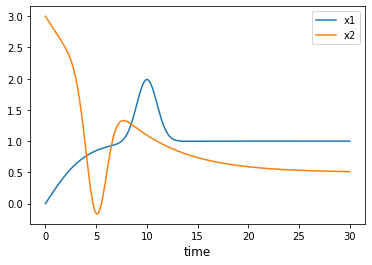

In [6]:
plt.plot(t_range,x1,label='x1')
plt.plot(t_range,x2,label='x2')
plt.xlabel('time',size=12)
plt.legend()
plt.show()

In the previous plot, we are showing just 2 variables. But any number of them could be added. The only limit in this kind of visualization is the overall readibility of the final chart.

When actually dealing with just 2 or 3 variables, we can represent the dynamics as a curve in the *state-space*, where time is the parameter of the curve (a *curvilinear coordinate*). 

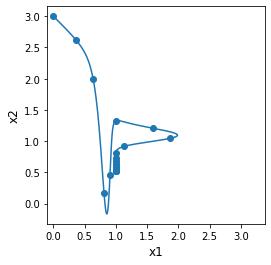

In [7]:
plt.plot(x1,x2)
plt.scatter(x1[::50],x2[::50])
plt.axis('square')
plt.xlabel('x1',size=12)
plt.ylabel('x2',size=12)
plt.show()

The dots on the curve requesent equal intervals of time: One dot per 50 time step (the meaning of **x1[::50]** and **x2[::50]**). Notice that the curve *converges* to a **fixed point** at $x_1=1$ and $x_2=0.5$, as we know from the previous plot. But we can deduce this result again obsering that the flow withing the state-space *slows down* as the curve approaches $(1,0.5)$. In fact, the relative lengths of the sections of the curve between consecutive time steps represents the speed at which the system is moving within the state-space.

These values of $x_1$ and $x_2$ could be, for example, the solution of a systems of ODEs with initial conditions $x_1(0)=0$ and $x_2(0)=3$. This plot could then be repeated for any viable set of initial conditions to represent the **state space flow** (there are many different names for this kind of visualization, including *phase diagram*. The term phase diagram is often used in physics when $x_2$ id the *conjugate momentum* to $x_1$, i.e. when $x_2=dx_1/dt$.)

We can visualize the state-space flow of a system of ODEs with Matplotlib using the **streamplot** function, from the module **pyplot**.

As an example, let's consider the motion of a simple pendulum, i.e. a dynamical system described by the 2nd order ODE

$$\frac{d^2 \theta}{dt^2} = -\sin(\theta)$$

We have seen in class that we can describe the system in terms of *two* dynamic variables, $x_1=\theta$ and $x_2 = d\theta/dt$. Our initial ODE is then equivalent to the following system of two normal ODEs of the 1st order:

$$\frac{dx_1}{dt}=x_2$$
$$\frac{dx_2}{dt}=-\sin(x_1)$$

We can then solve this system using **odeint**, as we did in Module 3. But -as long as we are just interested in the visualizing the flow- we can evcen avoid solving the equations, and use **streamplot** directly:

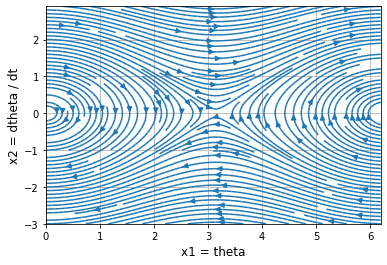

In [8]:
x1, x2 = np.meshgrid(np.arange(0, 2*np.pi, 0.1), np.arange(-3, 3, 0.1))
dx1dt = x2
dx2dt = -np.sin(x1)
plt.streamplot(x1, x2, dx1dt, dx2dt,density = 2)
plt.xlabel('x1 = theta',size=12)
plt.ylabel('x2 = dtheta / dt',size=12)
plt.grid(); plt.show()

Because of the specific example we are cosidering here, try to visualize the previous chart as the open side of a cylinder, where the left and right side are supposed to be in touch. You can notice the presence of two fixed points, at $\theta = x_1 = 0, \pi$ when d$\theta/$d$t =x_2 = 0$. Every other line, corresponds to a **closed orbit** (**cyclic attractor**). Can you figure out the dynamcal behaviors of the system that corresponding to these different cases?

Notice the use of the numpy function **meshgrid**. We'll need this function again in the following notebook. For additional options of **streamplot**, check its online documentation of  at

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html